### Renaming columns

In [1]:
import matplotlib.pyplot as plt
# opencv
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix



In [6]:


# Define paths
train = r"D:\fruits\fruits-360_original-size\fruits-360-original-size\train"
val = r"D:\fruits\fruits-360_original-size\fruits-360-original-size\val"
test = r"D:\fruits\fruits-360_original-size\fruits-360-original-size\test"

# Get class names
train_classes = set(os.listdir(train))
val_classes = set(os.listdir(val))
test_classes = set(os.listdir(test))

# Find common and mismatched class names
common_classes = train_classes & val_classes & test_classes
train_only = train_classes - common_classes
val_only = val_classes - common_classes
test_only = test_classes - common_classes

# Print summary
print(f" Common classes in all sets: {len(common_classes)}\n")
print(f" Classes only in train: {train_only}")
print(f" Classes only in val: {val_only}")
print(f" Classes only in test: {test_only}")






 Common classes in all sets: 15

 Classes only in train: set()
 Classes only in val: set()
 Classes only in test: set()


In [26]:
import os
import re

folder = r"D:\fruits\fruits-360_original-size\fruits-360-original-size\train"

for class_folder in os.listdir(folder):
    old_path = os.path.join(folder, class_folder)
    
    # Remove trailing underscores and numbers (e.g., 'carrot_1' → 'carrot')
    new_name = re.sub(r'[_\s]?\d+$', '', class_folder.lower())
    new_path = os.path.join(folder, new_name)

    if old_path == new_path:
        continue  # Already correct

    if not os.path.exists(new_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {class_folder} → {new_name}")
    else:
        print(f"⚠️ Skipped (already exists): {new_name}")


Renamed: Apple 5 → apple
Renamed: Avocado Black 1 → avocado black
Renamed: Beans 1 → beans
Renamed: Blackberrie 1 → blackberrie
Renamed: Cabbage red 1 → cabbage red
Renamed: Cactus fruit green 1 → cactus fruit green
Renamed: Caju seed 1 → caju seed
Renamed: carrot_1 → carrot
Renamed: Cherimoya 1 → cherimoya
Renamed: Cherry 3 → cherry
Renamed: Cucumber 4 → cucumber
Renamed: eggplant_long_1 → eggplant_long
Renamed: Gooseberry 1 → gooseberry
Renamed: Nut 1 → nut
Renamed: pear_1 → pear


In [7]:

dataset_dir = r'D:\fruits\fruits-360_original-size\fruits-360-original-size\train'  # change to val or test if needed

total_images = 0

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([
            img for img in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, img))
        ])
        print(f"{class_name}: {image_count} images")
        total_images += image_count

print(f"\nTotal images in '{dataset_dir}': {total_images}")

apple: 294 images
avocado black: 468 images
beans: 155 images
blackberrie: 300 images
cabbage red: 99 images
cactus fruit green: 465 images
caju seed: 151 images
carrot: 101 images
cherimoya: 648 images
cherry: 465 images
cucumber: 152 images
eggplant_long: 160 images
gooseberry: 310 images
nut: 161 images
pear: 326 images

Total images in 'D:\fruits\fruits-360_original-size\fruits-360-original-size\train': 4255


In [8]:

dataset_dir = r'D:\fruits\fruits-360_original-size\fruits-360-original-size\val'  # change to val or test if needed

total_images = 0

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([
            img for img in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, img))
        ])
        print(f"{class_name}: {image_count} images")
        total_images += image_count

print(f"\nTotal images in '{dataset_dir}': {total_images}")

apple: 146 images
avocado black: 234 images
beans: 78 images
blackberrie: 150 images
cabbage red: 50 images
cactus fruit green: 234 images
caju seed: 75 images
carrot: 50 images
cherimoya: 324 images
cherry: 234 images
cucumber: 76 images
eggplant_long: 80 images
gooseberry: 156 images
nut: 80 images
pear: 162 images

Total images in 'D:\fruits\fruits-360_original-size\fruits-360-original-size\val': 2129


In [9]:

dataset_dir = r'D:\fruits\fruits-360_original-size\fruits-360-original-size\test'  # change to val or test if needed

total_images = 0

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([
            img for img in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, img))
        ])
        print(f"{class_name}: {image_count} images")
        total_images += image_count

print(f"\nTotal images in '{dataset_dir}': {total_images}")

apple: 146 images
avocado black: 231 images
beans: 77 images
blackberrie: 150 images
cabbage red: 49 images
cactus fruit green: 231 images
caju seed: 75 images
carrot: 50 images
cherimoya: 320 images
cherry: 231 images
cucumber: 76 images
eggplant_long: 80 images
gooseberry: 154 images
nut: 80 images
pear: 162 images

Total images in 'D:\fruits\fruits-360_original-size\fruits-360-original-size\test': 2112


## Image Generators and Data Preparation


In [10]:
train_image_gen= ImageDataGenerator(
                              # normalize
                              rescale=1/255, 
                              rotation_range=30, 
                              width_shift_range=0.1, 
                              shear_range=0.9, 
                            zoom_range=0.2, 
                              horizontal_flip=True, 
                              height_shift_range=0.1)

In [11]:

train_img = train_image_gen.flow_from_directory(train,
                                              target_size = (224,224)
                                              , batch_size=16,
                                              class_mode = 'sparse')

Found 4255 images belonging to 15 classes.


In [12]:
val_image_gen = ImageDataGenerator(rescale=1/255)

In [13]:
val_image = val_image_gen.flow_from_directory(val,
                                              target_size = (224,224)
                                              , batch_size=16,
                                              class_mode = 'sparse')

Found 2129 images belonging to 15 classes.


In [14]:
test_image_gen = ImageDataGenerator(rescale=1./255)

test_img = test_image_gen.flow_from_directory(
    test,
        target_size=(224, 224),
        batch_size=16,
        class_mode='sparse',
        shuffle=False  # Important for consistent evaluation, especially with confusion matrix etc.
    )


Found 2112 images belonging to 15 classes.


In [15]:
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train))
num_classes

15

## Model Structure

In [16]:
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


Training while freezing base layers, no early stopping and few epochs

## Training ResNet50

In [60]:
base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet_model = build_model(base)

for layer in base.layers:
    layer.trainable = False

resnet_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet = resnet_model.fit(train_img, validation_data=val_image, epochs=2)


Epoch 1/2
266/266 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.1049 - loss: 2.9179 - val_accuracy: 0.1522 - val_loss: 2.4729
Epoch 2/2
266/266 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.1491 - loss: 2.6059 - val_accuracy: 0.2184 - val_loss: 2.4278


Unfreezing base layers, early stopping and more epochs

In [17]:
# Freeze all base layers first

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)

# Base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

# Build and compile model
resnet_model_2 = build_model(base_model)
resnet_model_2.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Phase 1: Train only top layers
history_phase1 = resnet_model_2.fit(train_img, validation_data=val_image, epochs=8, callbacks=[early_stop, reduce_lr])

# Phase 2: Fine-tuning
for layer in base_model.layers[-5:]:
    layer.trainable = True

resnet_model_2.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_phase2 = resnet_model_2.fit(train_img, validation_data=val_image, epochs=2, callbacks=[early_stop, reduce_lr])



c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.1123 - loss: 2.8920 - val_accuracy: 0.1522 - val_loss: 2.5049 - learning_rate: 1.0000e-04
Epoch 2/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.1458 - loss: 2.6116 - val_accuracy: 0.1522 - val_loss: 2.4481 - learning_rate: 1.0000e-04
Epoch 3/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.1493 - loss: 2.5325 - val_accuracy: 0.2508 - val_loss: 2.3954 - learning_rate: 1.0000e-04
Epoch 4/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.1674 - loss: 2.5160 - val_accuracy: 0.2024 - val_loss: 2.3036 - learning_rate: 1.0000e-04
Epoch 5/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.2012 - loss: 2.4562 - val_accuracy: 0.3870 - val_loss: 2.2235 - learning_rate: 1.0000e-04
Epoch 6/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.2158 - loss: 2.3947 - val_accuracy: 0.3236 - val_loss: 2.1144 - learning_rate: 1.0000e-04
Epoch 7/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 

In [18]:
test_loss_resnet, test_acc_resnet = resnet_model_2.evaluate(test_img)
print(f"✅ Test Accuracy: {test_acc_resnet*100:.2f}%")


c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.4043 - loss: 1.5539
✅ Test Accuracy: 50.43%


In [22]:
resnet_model_2.save('resnet_finetuned_model.h5')


132/132 ━━━━━━━━━━━━━━━━━━━━ 133s 990ms/step
                    precision    recall  f1-score   support

             apple       0.33      0.01      0.01       146
     avocado black       0.42      0.50      0.46       231
             beans       1.00      1.00      1.00        77
       blackberrie       0.80      0.62      0.70       150
       cabbage red       0.00      0.00      0.00        49
cactus fruit green       0.65      0.18      0.28       231
         caju seed       0.00      0.00      0.00        75
            carrot       0.00      0.00      0.00        50
         cherimoya       0.39      0.99      0.56       320
            cherry       0.73      1.00      0.84       231
          cucumber       0.00      0.00      0.00        76
     eggplant_long       0.98      0.80      0.88        80
        gooseberry       0.17      0.01      0.01       154
               nut       0.00      0.00      0.00        80
              pear       0.34      0.78      0.47     

c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

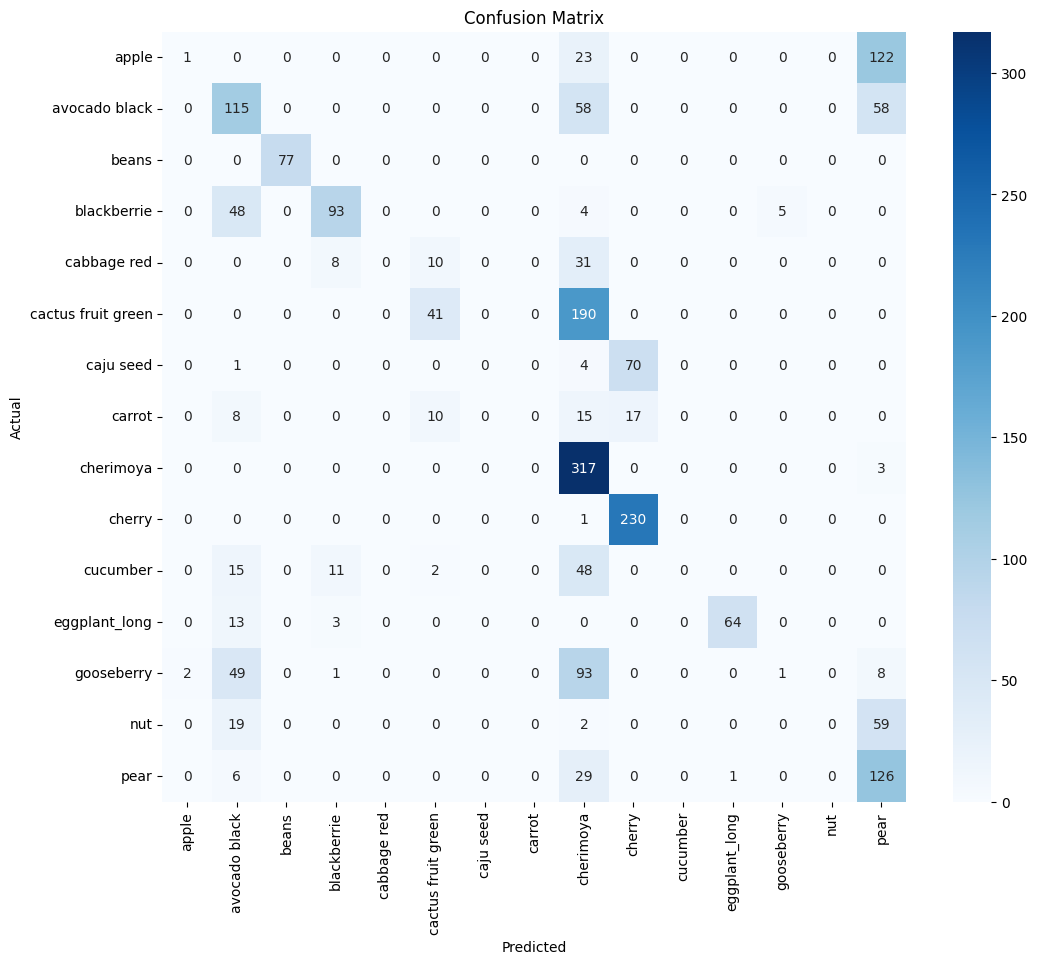

In [19]:

y_pred_probs_resnet = resnet_model_2.predict(test_img)
y_pred_resnet = np.argmax(y_pred_probs_resnet, axis=1)
y_true = test_img.classes

# Labels
class_labels = list(test_img.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_resnet, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_resnet)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
def combine_histories(h1, h2):
    combined = {}
    for key in h1.history:
        combined[key] = h1.history[key] + h2.history.get(key, [])
    return combined
# keras history wrapper
class DummyHistory:
    def __init__(self, history):
        self.history = history
combined_dict = combine_histories(history_phase1, history_phase2)

combined_history = DummyHistory(combined_dict)



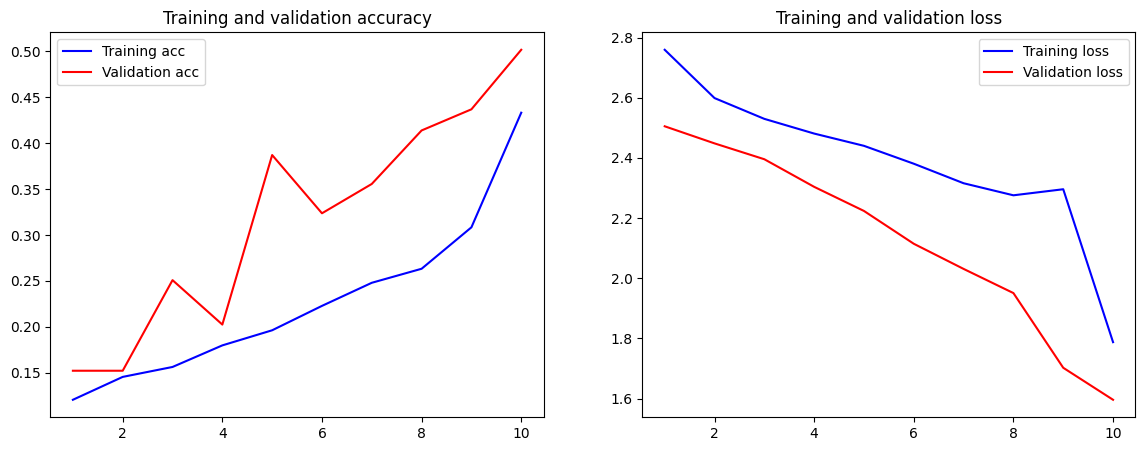

In [21]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training(combined_history)



## Training Vgg16

In [23]:

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False  # Freeze all layers initially

vgg_model = build_model(base_model_vgg)

vgg_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training only top layers (frozen base)...")
history_vgg_phase1 = vgg_model.fit(train_img, validation_data=val_image, epochs=8,
                                   callbacks=[early_stop, reduce_lr])

for layer in base_model_vgg.layers[-5:]:
    layer.trainable = True

vgg_model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("🔓 Fine-tuning last 10 layers of VGG16...")
history_vgg_phase2 = vgg_model.fit(train_img, validation_data=val_image, epochs=2,
                                   callbacks=[early_stop, reduce_lr])


Training only top layers (frozen base)...
Epoch 1/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 689s 3s/step - accuracy: 0.1151 - loss: 2.7678 - val_accuracy: 0.2621 - val_loss: 2.1943 - learning_rate: 1.0000e-04
Epoch 2/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 845s 3s/step - accuracy: 0.3022 - loss: 2.2687 - val_accuracy: 0.6054 - val_loss: 1.8287 - learning_rate: 1.0000e-04
Epoch 3/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 804s 3s/step - accuracy: 0.4220 - loss: 1.9808 - val_accuracy: 0.6665 - val_loss: 1.5142 - learning_rate: 1.0000e-04
Epoch 4/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 700s 3s/step - accuracy: 0.5233 - loss: 1.7038 - val_accuracy: 0.7529 - val_loss: 1.2572 - learning_rate: 1.0000e-04
Epoch 5/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 716s 3s/step - accuracy: 0.5675 - loss: 1.5064 - val_accuracy: 0.8661 - val_loss: 1.0653 - learning_rate: 1.0000e-04
Epoch 6/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 723s 3s/step - accuracy: 0.6178 - loss: 1.3146 - val_accuracy: 0.8807 - val_loss: 0.9104 - learning_rate: 1.0000e-04
Epoch 7/8
266/266 ━━━━

In [27]:
vgg_model.save('vgg16_finetuned_model.h5')

In [30]:
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_img)
print(f"✅ Test Accuracy: {test_acc_vgg*100:.2f}%")


132/132 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.9995 - loss: 0.0211
✅ Test Accuracy: 99.81%


132/132 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step
                    precision    recall  f1-score   support

             apple       0.97      1.00      0.99       146
     avocado black       1.00      1.00      1.00       231
             beans       1.00      1.00      1.00        77
       blackberrie       1.00      1.00      1.00       150
       cabbage red       1.00      1.00      1.00        49
cactus fruit green       1.00      1.00      1.00       231
         caju seed       1.00      1.00      1.00        75
            carrot       1.00      1.00      1.00        50
         cherimoya       1.00      1.00      1.00       320
            cherry       1.00      1.00      1.00       231
          cucumber       1.00      0.96      0.98        76
     eggplant_long       1.00      1.00      1.00        80
        gooseberry       1.00      0.99      1.00       154
               nut       1.00      1.00      1.00        80
              pear       1.00      1.00      1.00       1

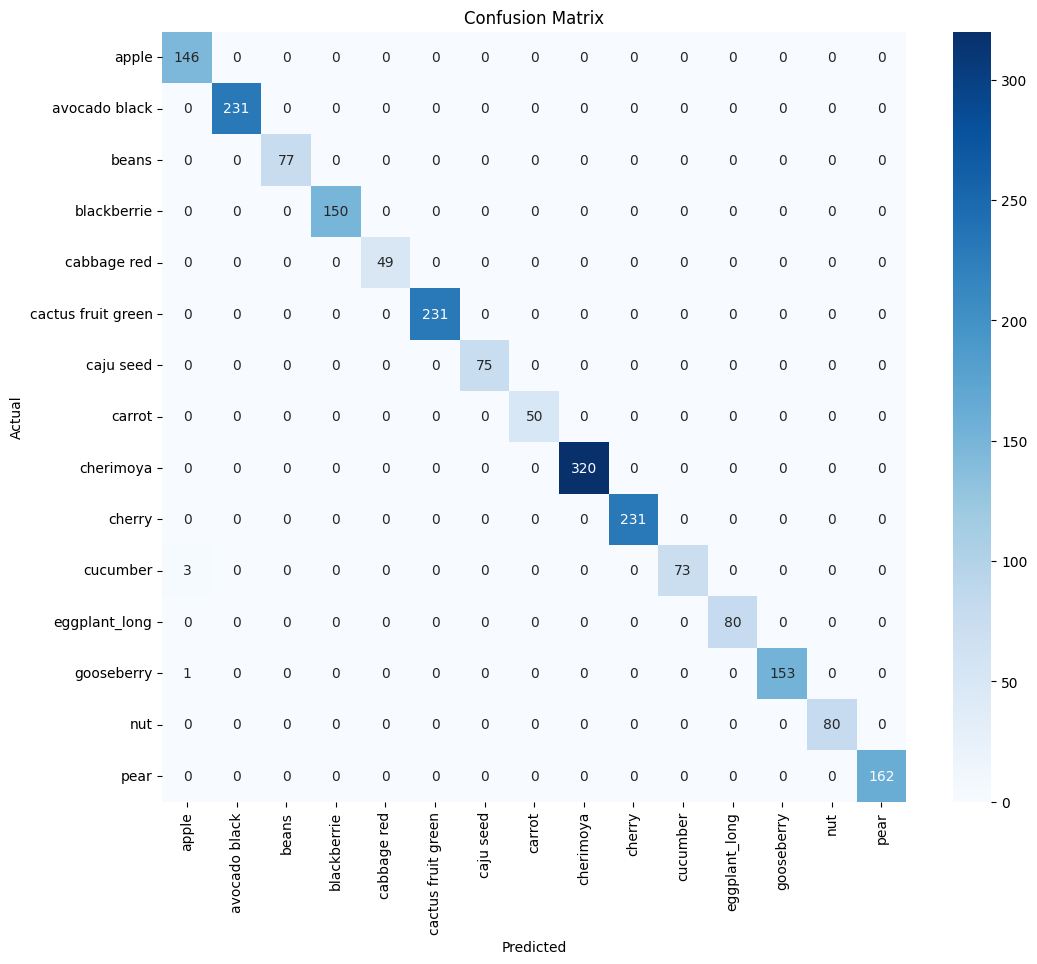

In [25]:
y_pred_probs_vgg = vgg_model.predict(test_img)
y_pred_vgg = np.argmax(y_pred_probs_vgg, axis=1)
y_true = test_img.classes

# Labels
class_labels = list(test_img.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_vgg, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_vgg)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

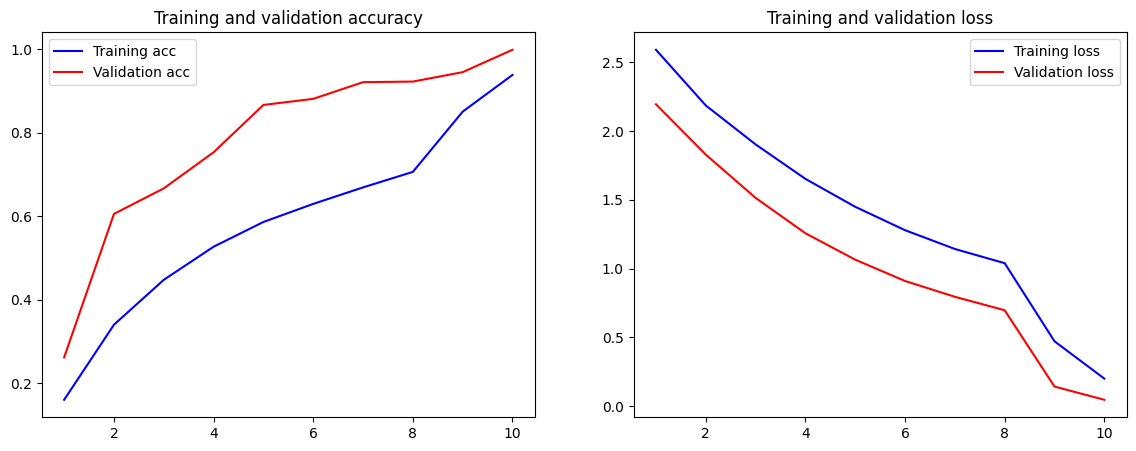

In [31]:

combined_dict = combine_histories(history_vgg_phase1, history_vgg_phase2)

combined_history = DummyHistory(combined_dict)

plot_training(combined_history)

## Training EfficientNetB0

In [28]:


# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)

# Load EfficientNetB0 without top
base_model_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_eff.trainable = False  # Phase 1: Freeze all base layers

# Build your model (custom function to add top layers)
eff_model = build_model(base_model_eff)

# Compile
eff_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔒 Phase 1: Train only top layers
print("Training top layers of EfficientNetB0...")
history_eff_phase1 = eff_model.fit(train_img, validation_data=val_image, epochs=8,
                                   callbacks=[early_stop, reduce_lr])

# 🔓 Phase 2: Fine-tune last few layers of EfficientNet
for layer in base_model_eff.layers[-5:]:
    layer.trainable = True

eff_model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Fine-tuning last 5 layers of EfficientNetB0...")
history_eff_phase2 = eff_model.fit(train_img, validation_data=val_image, epochs=2,
                                   callbacks=[early_stop, reduce_lr])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step
Training top layers of EfficientNetB0...
Epoch 1/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 238s 860ms/step - accuracy: 0.1305 - loss: 2.6285 - val_accuracy: 0.1522 - val_loss: 2.5610 - learning_rate: 1.0000e-04
Epoch 2/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 226s 851ms/step - accuracy: 0.1428 - loss: 2.5923 - val_accuracy: 0.1522 - val_loss: 2.5562 - learning_rate: 1.0000e-04
Epoch 3/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 223s 840ms/step - accuracy: 0.1529 - loss: 2.5696 - val_accuracy: 0.1522 - val_loss: 2.5591 - learning_rate: 1.0000e-04
Epoch 4/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 224s 841ms/step - accuracy: 0.1396 - loss: 2.5826 - val_accuracy: 0.1522 - val_loss: 2.5601 - learning_rate: 1.0000e-04
Epoch 5/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 229s 863ms/step - accuracy: 0.1434 - loss: 2.5852 - val_accuracy: 0.1522 - val_loss: 2.5540 - learning_rate: 1.0000e-04
Epoch 6/8
266/266 ━━━━━━━━━━━━━━━━━━━━ 232s 873ms/step - accuracy: 0.1489 - loss: 2.5810 - val_accuracy: 0.1522 

In [29]:
eff_model.save('eff_finetuned_model.h5')

In [32]:
test_loss_eff, test_acc_eff = eff_model.evaluate(test_img)
print(f"✅ Test Accuracy: {test_acc_eff*100:.2f}%")


132/132 ━━━━━━━━━━━━━━━━━━━━ 72s 544ms/step - accuracy: 0.0911 - loss: 2.6048
✅ Test Accuracy: 15.15%


132/132 ━━━━━━━━━━━━━━━━━━━━ 75s 547ms/step
                    precision    recall  f1-score   support

             apple       0.00      0.00      0.00       146
     avocado black       0.00      0.00      0.00       231
             beans       0.00      0.00      0.00        77
       blackberrie       0.00      0.00      0.00       150
       cabbage red       0.00      0.00      0.00        49
cactus fruit green       0.00      0.00      0.00       231
         caju seed       0.00      0.00      0.00        75
            carrot       0.00      0.00      0.00        50
         cherimoya       0.15      1.00      0.26       320
            cherry       0.00      0.00      0.00       231
          cucumber       0.00      0.00      0.00        76
     eggplant_long       0.00      0.00      0.00        80
        gooseberry       0.00      0.00      0.00       154
               nut       0.00      0.00      0.00        80
              pear       0.00      0.00      0.00      

c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zehra\anaconda3\envs\env_for_eda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

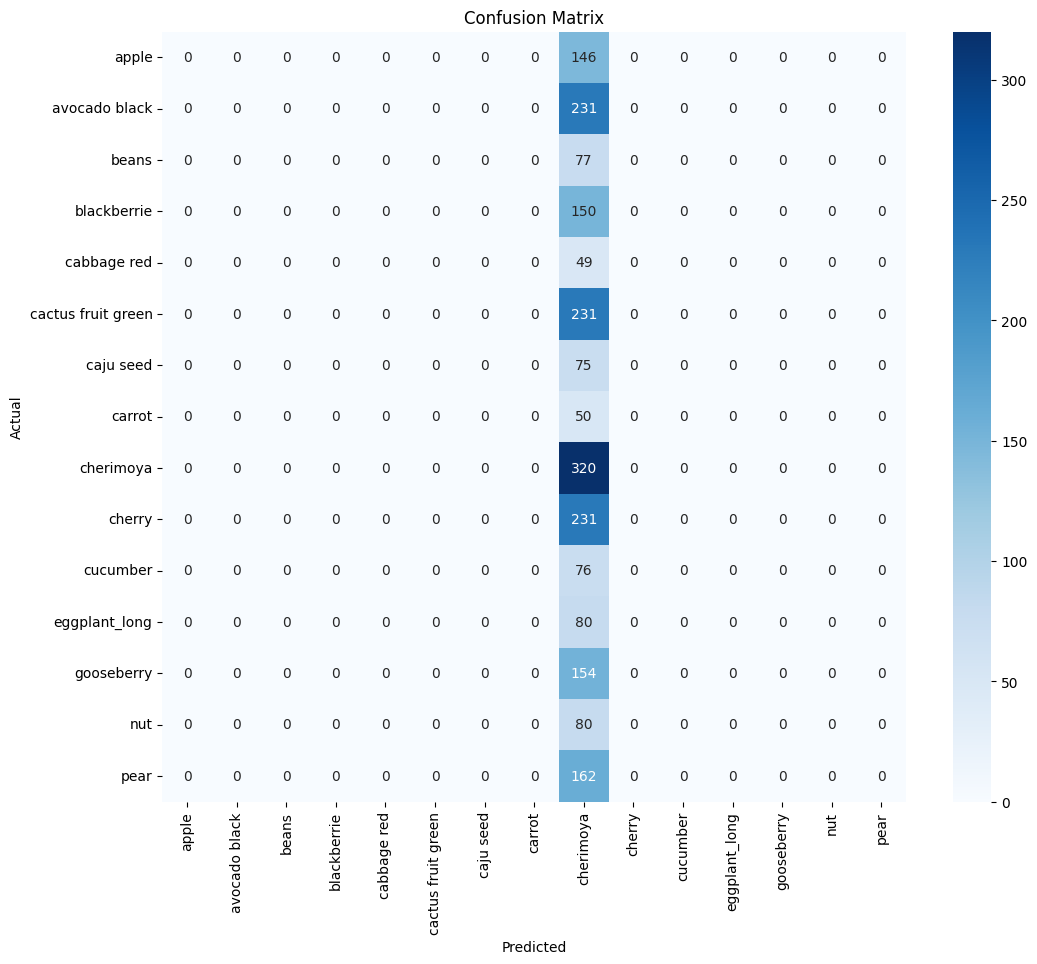

In [33]:
y_pred_probs_eff = eff_model.predict(test_img)
y_pred_eff = np.argmax(y_pred_probs_eff, axis=1)
y_true = test_img.classes

# Labels
class_labels = list(test_img.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_eff, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_eff)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

combined_dict = combine_histories(history_eff_phase1, history_eff_phase2)

combined_history = DummyHistory(combined_dict)

plot_training(combined_history)

# Using Yolo For Image Classification